## 그룹별 박스플롯
- 특정 그룹에서 예상치 못한 값을 드러낼 수 있다.
- 범주별 변수 분포를 직관적으로 보여준다.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nls97=pd.read_csv('C:/data-cleansing-main/Chapter05/data/nls97.csv')
nls97.set_index('personid',inplace=True)
covidtotals=pd.read_csv('C:/data-cleansing-main/Chapter05/data/covidtotals.csv',parse_dates=['lastdate'])
covidtotals.set_index('iso_code',inplace=True)

In [19]:
# 학력별 근무 주 수의 중앙값, 제1사분위수, 제3사분위수 시각화
def gettots(x):
    out={}
    out['min']=x.min()
    out['qr1']=x.quantile(0.25)
    out['med']=x.median()
    out['qr3']=x.quantile(0.75)
    out['max']=x.max()
    out['count']=x.count()
    return pd.Series(out)

In [20]:
nls97.groupby(['highestdegree'])['weeksworked17'].apply(gettots).unstack()      # apply로 각 그룹에 대해 함수 호출..신기하네

,min,qr1,med,qr3,max,count
highestdegree,,,,,,
0. None,0.0,0.0,40.0,52.0,52.0,510.0
1. GED,0.0,8.0,47.0,52.0,52.0,848.0
2. High School,0.0,31.0,49.0,52.0,52.0,2665.0
3. Associates,0.0,42.0,49.0,52.0,52.0,593.0
4. Bachelors,0.0,45.0,50.0,52.0,52.0,1342.0
5. Masters,0.0,46.0,50.0,52.0,52.0,538.0
6. PhD,0.0,46.5,50.0,52.0,52.0,51.0
7. Professional,0.0,47.0,50.0,52.0,52.0,97.0


### 학력 별 근무 주 수의 박스플롯

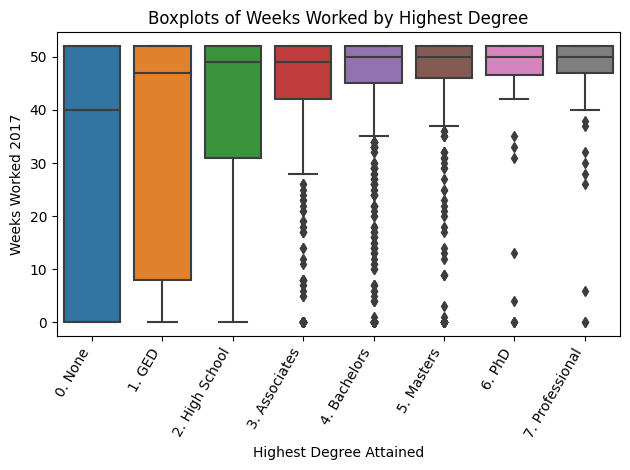

In [42]:
myplt = sns.boxplot(data=nls97,x='highestdegree',y='weeksworked17', order=sorted(nls97.highestdegree.dropna().unique()))
myplt.set_title("Boxplots of Weeks Worked by Highest Degree")
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.tight_layout()
plt.show()

- seaborn.boxplot 사용법이 책과 달라짐! data, x, y 순서대로 넣어줘야함

In [28]:
# 지역별 백만 명당 확진자 수
covidtotals.groupby(['region'])['total_cases_pm'].apply(gettots).unstack()

,min,qr1,med,qr3,max,count
region,,,,,,
Caribbean,95.035,251.51850,339.0095,1726.15975,4435.327,22.0
Central Africa,14.696,71.09900,367.5180,1538.36600,3317.196,11.0
Central America,93.053,924.54750,1447.8430,2190.56500,10274.481,7.0
Central Asia,373.866,918.89625,1974.4910,2906.75950,10593.831,6.0
East Africa,8.521,65.41800,190.1960,268.91700,5015.172,13.0
East Asia,2.611,15.98500,64.6315,269.34525,7825.695,16.0
Eastern Europe,346.726,882.72775,1189.8350,2317.46025,6854.143,22.0
North Africa,105.342,202.14600,421.0720,426.71700,793.067,5.0
North America,2290.093,2566.99750,2843.9020,6327.77900,9811.656,3.0


### 지역별 백만 명당 확진자 수의 박스플롯

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg

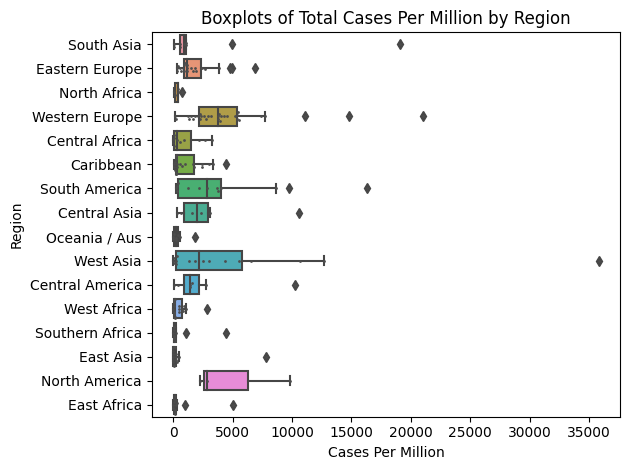

In [33]:
sns.boxplot(data=covidtotals,x='total_cases_pm',y='region')                                     # 지역의 수가 많으므로 축을 뒤바꾼다.
sns.swarmplot(y='region',x='total_cases_pm',data=covidtotals,size=2,color='.3',linewidth=0)     # 지역별 국가수에 대한 감을 잡기 위해 swarm plot그리기
plt.title("Boxplots of Total Cases Per Million by Region")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

- 근데 극단값 때문에 사분위 범위가 잘 보이지 않는다. 극단값을 제거하고 다시 그려보자

In [34]:
covidtotals.loc[covidtotals.total_cases_pm>=14000,['location','total_cases_pm']]

,location,total_cases_pm
iso_code,,
BHR,Bahrain,19082.231
CHL,Chile,16322.745
QAT,Qatar,35795.159
SMR,San Marino,21038.364
VAT,Vatican,14833.127


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg

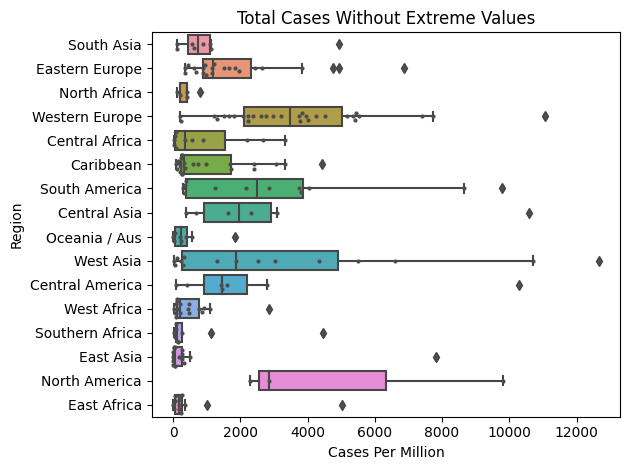

In [36]:
sns.boxplot(x='total_cases_pm',y='region',data=covidtotals.loc[covidtotals.total_cases_pm<14000])
sns.swarmplot(y="region", x="total_cases_pm", data=covidtotals.loc[covidtotals.total_cases_pm<14000], size=3, color=".3", linewidth=0)
plt.title("Total Cases Without Extreme Values")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


## 정리
1. 시본으로 그렸지만, 맷플롯립으로도 가능하다. but 시본이 더 사용하기 쉽고 심미적이다.
2. 박스플롯 생성 전 기술 통계를 내어보면 좋다.